In [18]:
import uncertainties
from uncertainties.umath import * # sin(), etc.
from uncertainties import ufloat
from uncertainties import unumpy, umath
import math
import math
from autograd import hessian
import autograd.numpy as np
import glob
import ROOT


In [19]:
result_files = []
for i in range(1):
    result_file = "/software/pc24403/tfpcbpggsz/test/Fitter.log"
    with open(result_file) as f:
        content = f.read()
    
        # Check if 'INVALID' is in the file content
        if not 'INVALID' in content:
            result_files.append(result_file)
        else:
            print(result_file)

print(f"Found {len(result_files)} valid results")

Found 1 valid results


In [12]:

foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
xp = []
name = []
FF={}

for result_file in result_files:
    do_next = True
    idx = 0
    idxs = []
    x = []
    dx = []
    cov = []
    name = []

    with open(result_file) as f: 
        for l in f:
            if "FitFraction" in l:
                a=l.split()
                name_i = a[1]
                name += [name_i]
                value = float(a[2])
                x += [value]
                error = float(a[3])
                dx += [error]
                idxs += [idx]
                idx +=1
        log_strings += [l.replace("\n", "")]

    FF = {name[i]: ufloat(x[i], dx[i]) for i in range(len(name))}
    




['FitFraction', 'D0{K*(892)+{K0S0,pi+},K-}', '0.34864028', '0.018437433']
['FitFraction', 'D0{K(0)*(1430)0[GLASS]{K-,pi+},K0S0}', '0.24191872', '0.03379262']
['FitFraction', 'D0{a(0)(1450)-{K0S0,K-},pi+}', '0.14285314', '0.021398808']
['FitFraction', 'D0{K(0)*(1430)+[GLASS]{K0S0,pi+},K-}', '0.055530384', '0.019637545']
['FitFraction', 'D0{rho(1700)-[GounarisSakurai]{K0S0,K-},pi+}', '0.042235002', '0.015316052']
['FitFraction', 'D0{K*(1410)0{K-,pi+},K0S0}', '0.040247081', '0.026183929']
['FitFraction', 'D0{K*(1410)+{K0S0,pi+},K-}', '0.024254088', '0.019736958']
['FitFraction', 'D0{rho(1450)-[GounarisSakurai]{K0S0,K-},pi+}', '0.018426431', '0.014552184']
['FitFraction', 'D0{K(2)*(1430)0{K-,pi+},K0S0}', '0.013937611', '0.0060479265']
['FitFraction', 'D0{a(2)(1320)-{K0S0,K-},pi+}', '0.00092080484', '0.0015865418']
['FitFraction', 'D0{K*(892)0{K-,pi+},K0S0}', '0.00078340985', '0.0010339581']
['FitFraction', 'Sum_D0', '0.92974696', '0.063863215']
['FitFraction', 'D0{K*(892)+{K0S0,pi+},K-}xD0

In [13]:
print(FF)

{'D0{K*(892)+{K0S0,pi+},K-}': 0.34864028+/-0.018437433, 'D0{K(0)*(1430)0[GLASS]{K-,pi+},K0S0}': 0.24191872+/-0.03379262, 'D0{a(0)(1450)-{K0S0,K-},pi+}': 0.14285314+/-0.021398808, 'D0{K(0)*(1430)+[GLASS]{K0S0,pi+},K-}': 0.055530384+/-0.019637545, 'D0{rho(1700)-[GounarisSakurai]{K0S0,K-},pi+}': 0.042235002+/-0.015316052, 'D0{K*(1410)0{K-,pi+},K0S0}': 0.040247081+/-0.026183929, 'D0{K*(1410)+{K0S0,pi+},K-}': 0.024254088+/-0.019736958, 'D0{rho(1450)-[GounarisSakurai]{K0S0,K-},pi+}': 0.018426431+/-0.014552184, 'D0{K(2)*(1430)0{K-,pi+},K0S0}': 0.013937611+/-0.0060479265, 'D0{a(2)(1320)-{K0S0,K-},pi+}': 0.00092080484+/-0.0015865418, 'D0{K*(892)0{K-,pi+},K0S0}': 0.00078340985+/-0.0010339581, 'Sum_D0': 0.92974696+/-0.063863215, 'D0{K*(892)+{K0S0,pi+},K-}xD0{K(0)*(1430)0[GLASS]{K-,pi+},K0S0}': 0.087509903+/-0.00573873, 'D0{K(0)*(1430)+[GLASS]{K0S0,pi+},K-}xD0{K(0)*(1430)0[GLASS]{K-,pi+},K0S0}': -0.029403867+/-0.010032268, 'D0{K(0)*(1430)0[GLASS]{K-,pi+},K0S0}xD0{rho(1450)-[GounarisSakurai]{K0S0,K

In [16]:
import pandas as pd
#Make a table from FF
df = pd.DataFrame(FF.items(), columns=['Parameter', 'Value'])
print(df)

                                            Parameter               Value
0                           D0{K*(892)+{K0S0,pi+},K-}       0.349+/-0.018
1                D0{K(0)*(1430)0[GLASS]{K-,pi+},K0S0}       0.242+/-0.034
2                        D0{a(0)(1450)-{K0S0,K-},pi+}       0.143+/-0.021
3                D0{K(0)*(1430)+[GLASS]{K0S0,pi+},K-}       0.056+/-0.020
4        D0{rho(1700)-[GounarisSakurai]{K0S0,K-},pi+}       0.042+/-0.015
..                                                ...                 ...
63  D0{K*(892)0{K-,pi+},K0S0}xD0{a(2)(1320)-{K0S0,...  -0.00009+/-0.00010
64  D0{a(2)(1320)-{K0S0,K-},pi+}xD0{rho(1450)-[Gou...  -0.00009+/-0.00011
65  D0{a(2)(1320)-{K0S0,K-},pi+}xD0{a(0)(1450)-{K0...        (-9+/-7)e-05
66  D0{a(2)(1320)-{K0S0,K-},pi+}xD0{rho(1700)-[Gou...     (3.3+/-2.5)e-05
67                                Sum_D0_interference       0.035+/-0.032

[68 rows x 2 columns]


In [17]:
print(df.to_latex(index=False))
#save to file
df.to_csv("FF.csv", index=False)

\begin{tabular}{ll}
\toprule
Parameter & Value \\
\midrule
D0{K*(892)+{K0S0,pi+},K-} & 0.349+/-0.018 \\
D0{K(0)*(1430)0[GLASS]{K-,pi+},K0S0} & 0.242+/-0.034 \\
D0{a(0)(1450)-{K0S0,K-},pi+} & 0.143+/-0.021 \\
D0{K(0)*(1430)+[GLASS]{K0S0,pi+},K-} & 0.056+/-0.020 \\
D0{rho(1700)-[GounarisSakurai]{K0S0,K-},pi+} & 0.042+/-0.015 \\
D0{K*(1410)0{K-,pi+},K0S0} & 0.040+/-0.026 \\
D0{K*(1410)+{K0S0,pi+},K-} & 0.024+/-0.020 \\
D0{rho(1450)-[GounarisSakurai]{K0S0,K-},pi+} & 0.018+/-0.015 \\
D0{K(2)*(1430)0{K-,pi+},K0S0} & 0.014+/-0.006 \\
D0{a(2)(1320)-{K0S0,K-},pi+} & 0.0009+/-0.0016 \\
D0{K*(892)0{K-,pi+},K0S0} & 0.0008+/-0.0010 \\
Sum_D0 & 0.93+/-0.06 \\
D0{K*(892)+{K0S0,pi+},K-}xD0{K(0)*(1430)0[GLASS]{K-,pi+},K0S0} & 0.088+/-0.006 \\
D0{K(0)*(1430)+[GLASS]{K0S0,pi+},K-}xD0{K(0)*(1430)0[GLASS]{K-,pi+},K0S0} & -0.029+/-0.010 \\
D0{K(0)*(1430)0[GLASS]{K-,pi+},K0S0}xD0{rho(1450)-[GounarisSakurai]{K0S0,K-},pi+} & -0.026+/-0.010 \\
D0{K*(892)+{K0S0,pi+},K-}xD0{K*(1410)0{K-,pi+},K0S0} & -0.024+/-0.00

In [36]:

def significance(chi2, ndf):
    # Calculate the p-value for the chi-square and ndf
    p_value = ROOT.TMath.Prob(chi2, ndf)
    
    # Convert p-value to sigma
    if p_value < 1e-15:  # Handle extremely small p-values
        return float('inf')  # Return infinity if p-value is extremely small
    sigma = ROOT.TMath.Sqrt(2) * ROOT.TMath.ErfInverse(1 - 2 * p_value)
    
    return sigma

foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
xp = []
name = []
res_fitted={}
baseline_fitted={}

#The fild put your baseline model
ori_file = "/software/pc24403/tfpcbpggsz/test/Fitter.log"
with open(ori_file) as f:
    name_i =[]
    ndf = []
    nll = []
    for l in f:
        if "FitQuality" in l:
            a=l.split()
            name = a[0]
            ndf = float(a[3])
            nll = float(a[4])


    baseline_fitted = {'baseline': ufloat(NLL, ndf)}



for result_file in result_files:
    do_next = True
    idx = 0
    idxs = []
    dx = []
    x = []

    cov = []
    name = []

    with open(result_file) as f: 
        for l in f:
            if "FitQuality" in l:
                a=l.split()
                name_i = result_file[:-4]
                name += [name_i]
                ndf = float(a[3])
                dx += [ndf]
                nll = float(a[4])
                x += [nll]
                idxs += [idx]
                idx +=1
        log_strings += [l.replace("\n", "")]

    res_fitted = {name[i]: ufloat(x[i], dx[i]) for i in range(len(name))}
    




['FitQuality', '0', '0', '20', '-5307.4578', '0']


In [ ]:
S = {}

In [38]:
for res_rm in solution:
S = {res_rm: significance(baseline_fitted['baseline'].n - res_fitted['/software/pc24403/tfpcbpggsz/test/Fitter'].n, baseline_fitted['baseline'].s + res_fitted['/software/pc24403/tfpcbpggsz/test/Fitter'].s)



TypeError: double TMath::Prob(double chi2, int ndf) =>
    could not convert argument 2 (int/long conversion expects an integer object)

In [77]:
import uncertainties
from uncertainties.umath import * # sin(), etc.
from uncertainties import ufloat
from uncertainties import unumpy, umath
import math
from autograd import hessian
import autograd.numpy as np
import glob
import ROOT
import pandas as pd


def significance(chi2, ndf):
    # Calculate the p-value for the chi-square and ndf
    chi2 = abs(chi2)
    ndf = int(ndf)
    p_value = ROOT.TMath.Prob(chi2, ndf)
    
    # Convert p-value to sigma
    if p_value < 1e-15:  # Handle extremely small p-values
        return float('inf')  # Return infinity if p-value is extremely small
    sigma = ROOT.TMath.Sqrt(2) * ROOT.TMath.ErfInverse(1 - 2 * p_value)
    
    return sigma

foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
xp = []
name = []
res_fitted={}
baseline_fitted={}

#The fild put your baseline model
ori_file = "/software/pc24403/tfpcbpggsz/test/Fitter.log"
with open(ori_file) as f:
    name_i =[]
    ndf = []
    nll = []
    for l in f:
        if "FitQuality" in l:
            a=l.split()
            name = a[0]
            ndf = float(a[3])
            nll = float(a[4])


baseline_fitted = {'baseline': ufloat(NLL, ndf)}


solutions = ['K892']

log_path = "/software/pc24403/tfpcbpggsz/test/"

idx = 0
idxs = []
dx = []
x = []
cov = []
name = []

for res_rm in solutions:
    with open(log_path+res_rm+'.log') as f: 
        for l in f:
            if "FitQuality" in l:
                a=l.split()
                name_i = res_rm
                name += [name_i]
                ndf = float(a[3])
                dx += [ndf]
                nll = float(a[4])
                x += [nll]
                idxs += [idx]
                idx +=1
        log_strings += [l.replace("\n", "")]


res_fitted = {name[i]: ufloat(x[i], dx[i]) for i in range(len(name))}
    

for res_rm in solutions:
    print(res_rm)
    S = {res_rm: significance(baseline_fitted['baseline'].n - res_fitted[res_rm].n, baseline_fitted['baseline'].s - res_fitted[res_rm].s)}

#Make a table from FF
df = pd.DataFrame(S.items(), columns=['Resonance', 'Significance'])
print(df)

K892
  Resonance  Significance
0      K892      6.674878


In [61]:
res_fitted

{'K892': -5250.4578+/-16.0}

K892


{'K892': 6.674877760256992}

In [35]:


# Example usage
chi2_value = 10.0  # Example chi-square value
ndf = 5            # Number of degrees of freedom
sigma_level = chi2_to_sigma(chi2_value, ndf)
print(f"Chi-square value: {chi2_value}, Degrees of freedom: {ndf}, Significance: {sigma_level:.2f} sigma")


Welcome to JupyROOT 6.20/00
Chi-square value: 10.0, Degrees of freedom: 5, Significance: 1.44 sigma


In [4]:
x_exp = [-0.0897, -0.0110, 0.0586, 0.0688, -0.0549, 0.0070]

In [5]:
xp_pull = []
yp_pull = []
xm_pull = []
ym_pull = []
xxi_pull = []
yxi_pull = []

for i in range(len(xp)):
    xp_pull.append((xp[i].n-x_exp[0])/xp[i].s)
    yp_pull.append((yp[i].n-x_exp[1])/yp[i].s)
    xm_pull.append((xm[i].n-x_exp[2])/xm[i].s)
    ym_pull.append((ym[i].n-x_exp[3])/ym[i].s)
    xxi_pull.append((xxi[i].n-x_exp[4])/xxi[i].s)
    yxi_pull.append((yxi[i].n-x_exp[5])/yxi[i].s)


Text(0.5, 0.5, 'mean: 0.15\nstd: 0.88')

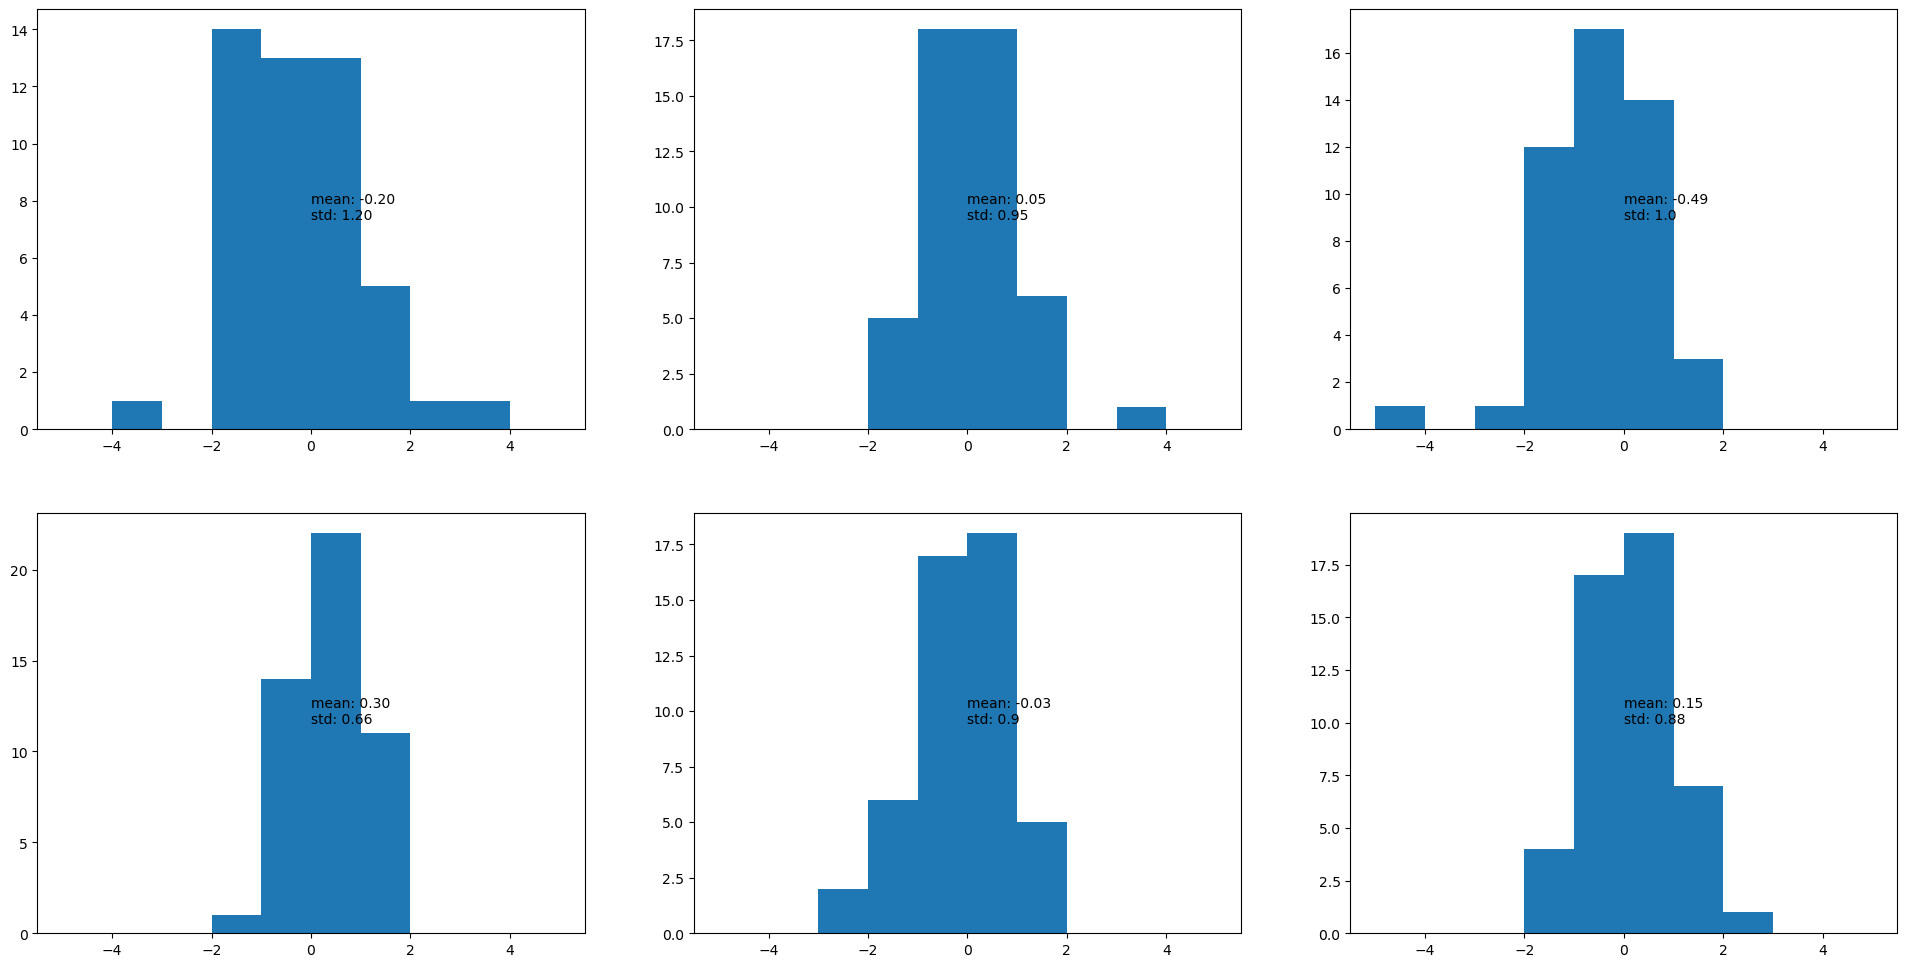

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8*3, 6*2))

ax1.hist(xp_pull, bins=10, range=(-5, 5), label="x+")
ax1.text(0.5, 0.5, f"mean: {np.mean(xp_pull):.2f}\nstd: {np.std(xp_pull):.2f}", transform=ax1.transAxes)

ax2.hist(yp_pull, bins=10, range=(-5, 5), label="y+")
ax2.text(0.5, 0.5, f"mean: {np.mean(yp_pull):.2f}\nstd: {np.std(yp_pull):.2}", transform=ax2.transAxes)

ax3.hist(xm_pull, bins=10, range=(-5, 5), label="x-")
ax3.text(0.5, 0.5, f"mean: {np.mean(xm_pull):.2f}\nstd: {np.std(xm_pull):.2}", transform=ax3.transAxes)

ax4.hist(ym_pull, bins=10, range=(-5, 5), label="y-")
ax4.text(0.5, 0.5, f"mean: {np.mean(ym_pull):.2f}\nstd: {np.std(ym_pull):.2}", transform=ax4.transAxes)

ax5.hist(xxi_pull, bins=10, range=(-5, 5), label="xxi")
ax5.text(0.5, 0.5, f"mean: {np.mean(xxi_pull):.2f}\nstd: {np.std(xxi_pull):.2}", transform=ax5.transAxes)

ax6.hist(yxi_pull, bins=10, range=(-5, 5), label="yxi")
ax6.text(0.5, 0.5, f"mean: {np.mean(yxi_pull):.2f}\nstd: {np.std(yxi_pull):.2}", transform=ax6.transAxes)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 121.2                      │              Nfcn = 41               │
│ EDM = 2.55e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

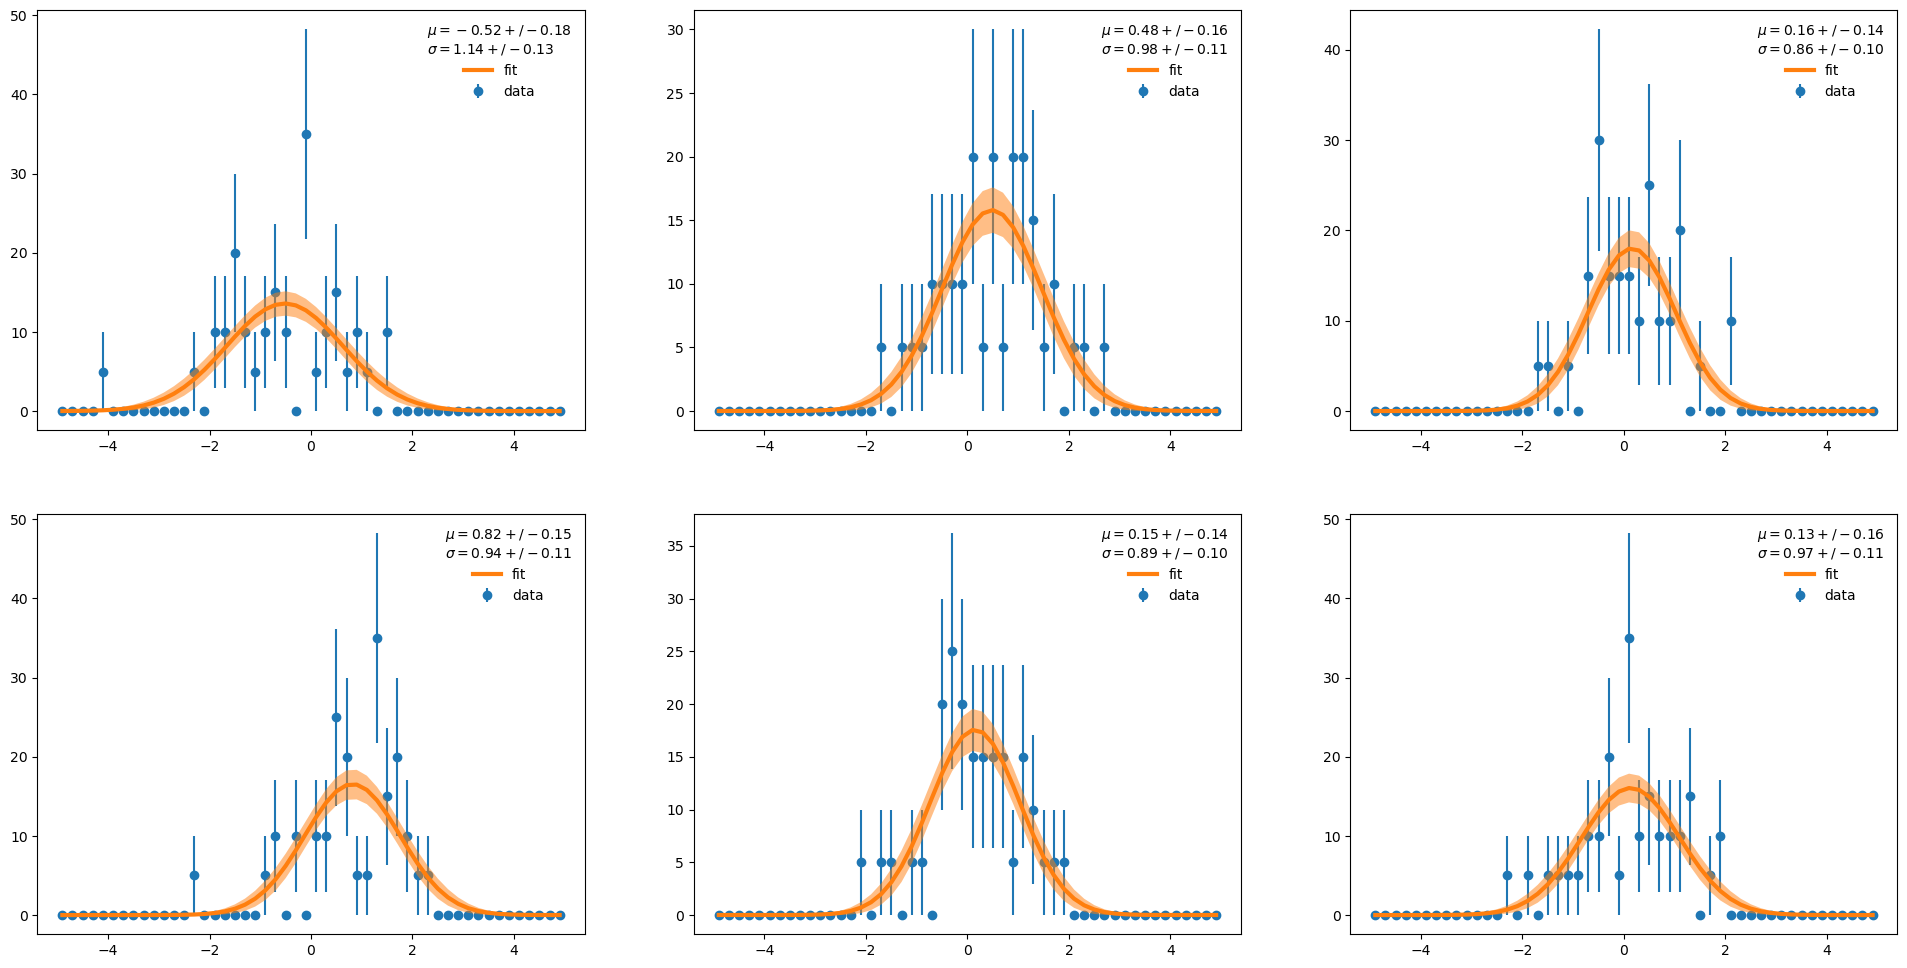

In [10]:
#Fit with Gaussian with iminuit
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL

ax= [ax1, ax2, ax3, ax4, ax5, ax6]

fig, ((ax[0], ax[1], ax[2]), (ax[3], ax[4], ax[5])) = plt.subplots(2, 3, figsize=(8*3, 6*2))
i=0
for data in [xp_pull, yp_pull, xm_pull, ym_pull, xxi_pull, yxi_pull]:
    def pdf(x, p):
        mu=p[0]
        sigma=p[1]
        return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))
    
    c = UnbinnedNLL(data, pdf)
    
    m = Minuit(c, (0, 1))
    m.migrad()
    m.hesse()
    print(m)
    
    w, xe = np.histogram(data, bins=50, range=(-5, 5))
    
    # compute bin-wise density estimates
    werr = w ** 0.5
    cx = 0.5 * (xe[1:] + xe[:-1])
    dx = np.diff(xe)
    d = w / dx
    derr = werr / dx
    #m.visualize()
    # plot everything
    from jacobi import propagate

    # run error propagation
    y, ycov = propagate(lambda p: len(xp_pull)*pdf(cx, p), m.values, m.covariance)

    # plot everything
    ax[i].errorbar(cx, d, derr, fmt="o", label="data", zorder=0)

    ax[i].plot(cx, y, lw=3, label="fit")

    # draw 1 sigma error band
    yerr_prop = np.diag(ycov) ** 0.5
    ax[i].fill_between(cx, y - yerr_prop, y + yerr_prop, facecolor="C1", alpha=0.5)

    ax[i].legend(frameon=False,
           title=f"$\mu = {m.values[0]:.2f} +/- {m.errors[0]:.2f}$\n"
                 f"$\sigma = {m.values[1]:.2f} +/- {m.errors[1]:.2f}$");



#    ax[i].errorbar(cx, d, derr, fmt="o", label="data", zorder=0)
#    ax[i].plot(cx, len(xp_pull)*pdf(cx, m.values[0], m.values[1]), lw=3,
#         label="fit")
#    ax[i].legend(frameon=False,
#           title=f"$\mu = {m.values[0]:.2f} +/- {m.errors[0]:.2f}$\n"
#                 f"$\sigma = {m.values[1]:.2f} +/- {m.errors[1]:.2f}$");
    i+=1

In [9]:
xp_res = []
yp_res = []
xm_res = []
ym_res = []
xxi_res = []
yxi_res = []

for i in range(len(xp)):
    xp_res.append((xp[i].n-x_exp[0]))
    yp_res.append((yp[i].n-x_exp[1]))
    xm_res.append((xm[i].n-x_exp[2]))
    ym_res.append((ym[i].n-x_exp[3]))
    xxi_res.append((xxi[i].n-x_exp[4]))
    yxi_res.append((yxi[i].n-x_exp[5]))


Text(0.5, 0.5, 'mean: 0.01\nstd: 0.024')

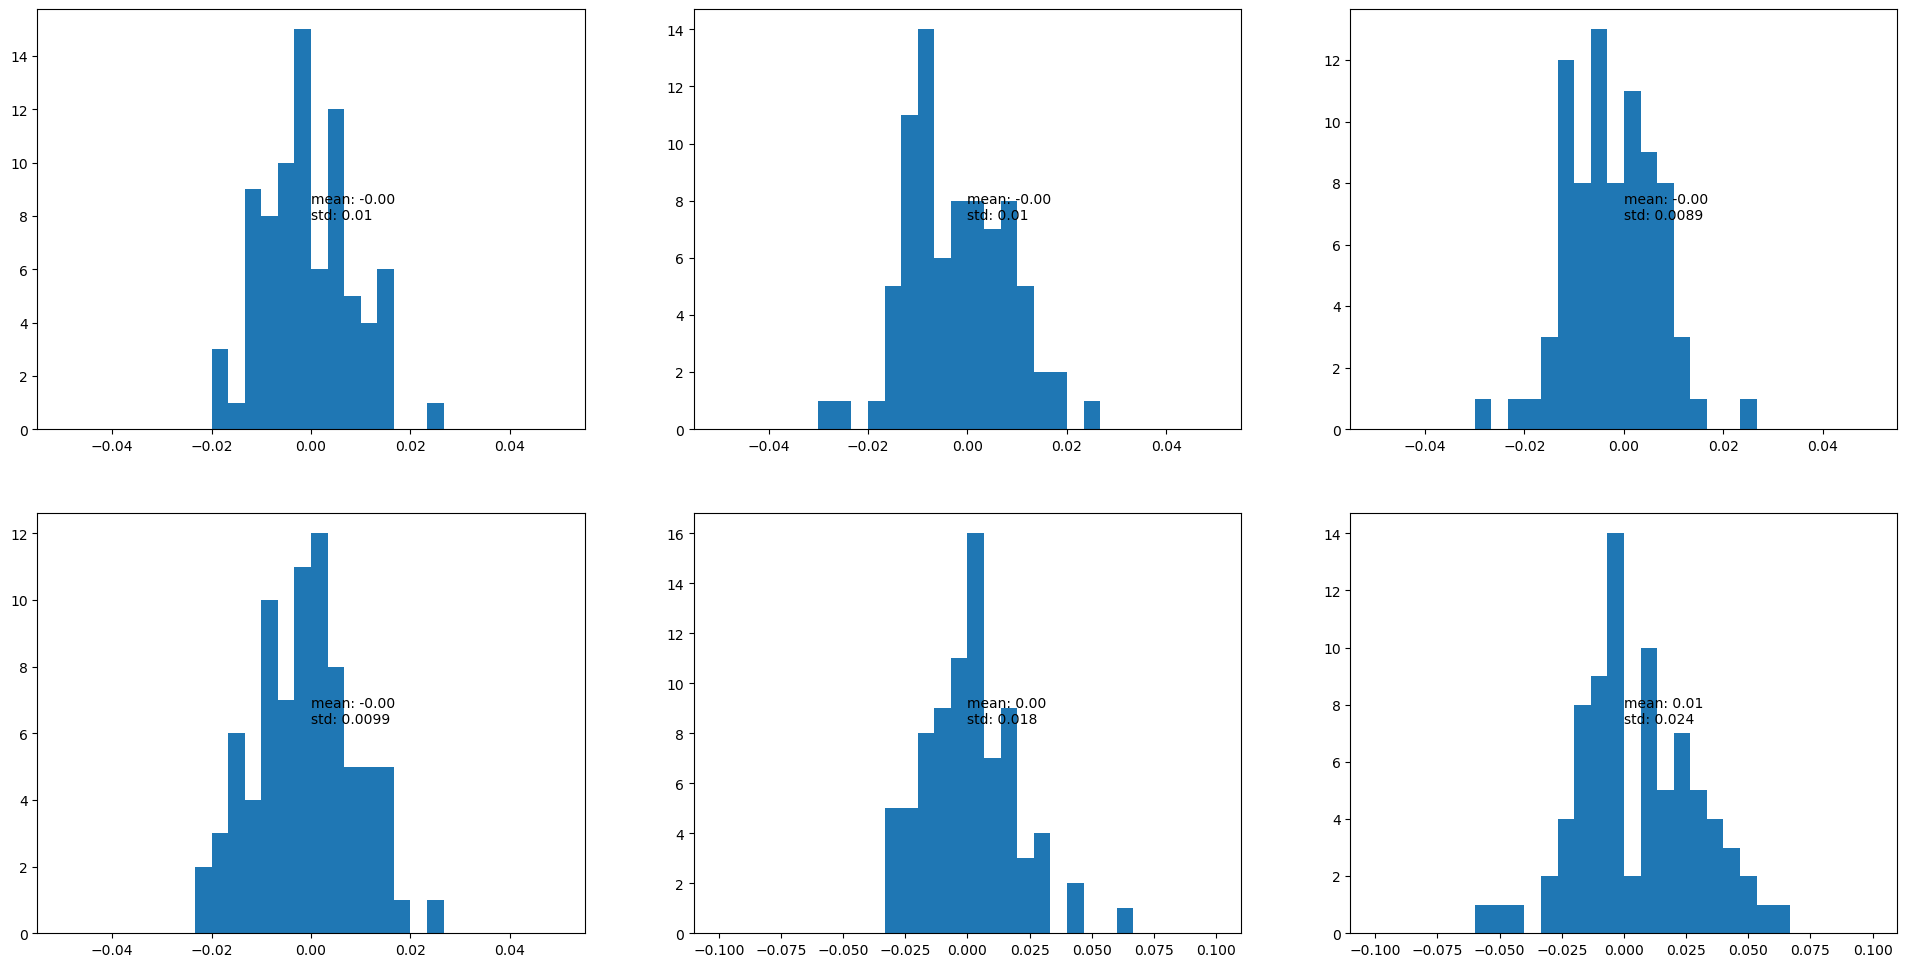

In [10]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8*3, 6*2))

ax1.hist(xp_res, bins=30, range=(-0.05, 0.05), label="x+")
ax1.text(0.5, 0.5, f"mean: {np.mean(xp_res):.2f}\nstd: {np.std(xp_res):.2f}", transform=ax1.transAxes)

ax2.hist(yp_res, bins=30, range=(-0.05, 0.05), label="y+")
ax2.text(0.5, 0.5, f"mean: {np.mean(yp_res):.2f}\nstd: {np.std(yp_res):.2}", transform=ax2.transAxes)

ax3.hist(xm_res, bins=30, range=(-0.05, 0.05), label="x-")
ax3.text(0.5, 0.5, f"mean: {np.mean(xm_res):.2f}\nstd: {np.std(xm_res):.2}", transform=ax3.transAxes)

ax4.hist(ym_res, bins=30, range=(-0.05, 0.05), label="y-")
ax4.text(0.5, 0.5, f"mean: {np.mean(ym_res):.2f}\nstd: {np.std(ym_res):.2}", transform=ax4.transAxes)

ax5.hist(xxi_res, bins=30, range=(-0.1, 0.1), label="xxi")
ax5.text(0.5, 0.5, f"mean: {np.mean(xxi_res):.2f}\nstd: {np.std(xxi_res):.2}", transform=ax5.transAxes)

ax6.hist(yxi_res, bins=30, range=(-0.1, 0.1), label="yxi")
ax6.text(0.5, 0.5, f"mean: {np.mean(yxi_res):.2f}\nstd: {np.std(yxi_res):.2}", transform=ax6.transAxes)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -527.2                     │              Nfcn = 44               │
│ EDM = 2.57e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

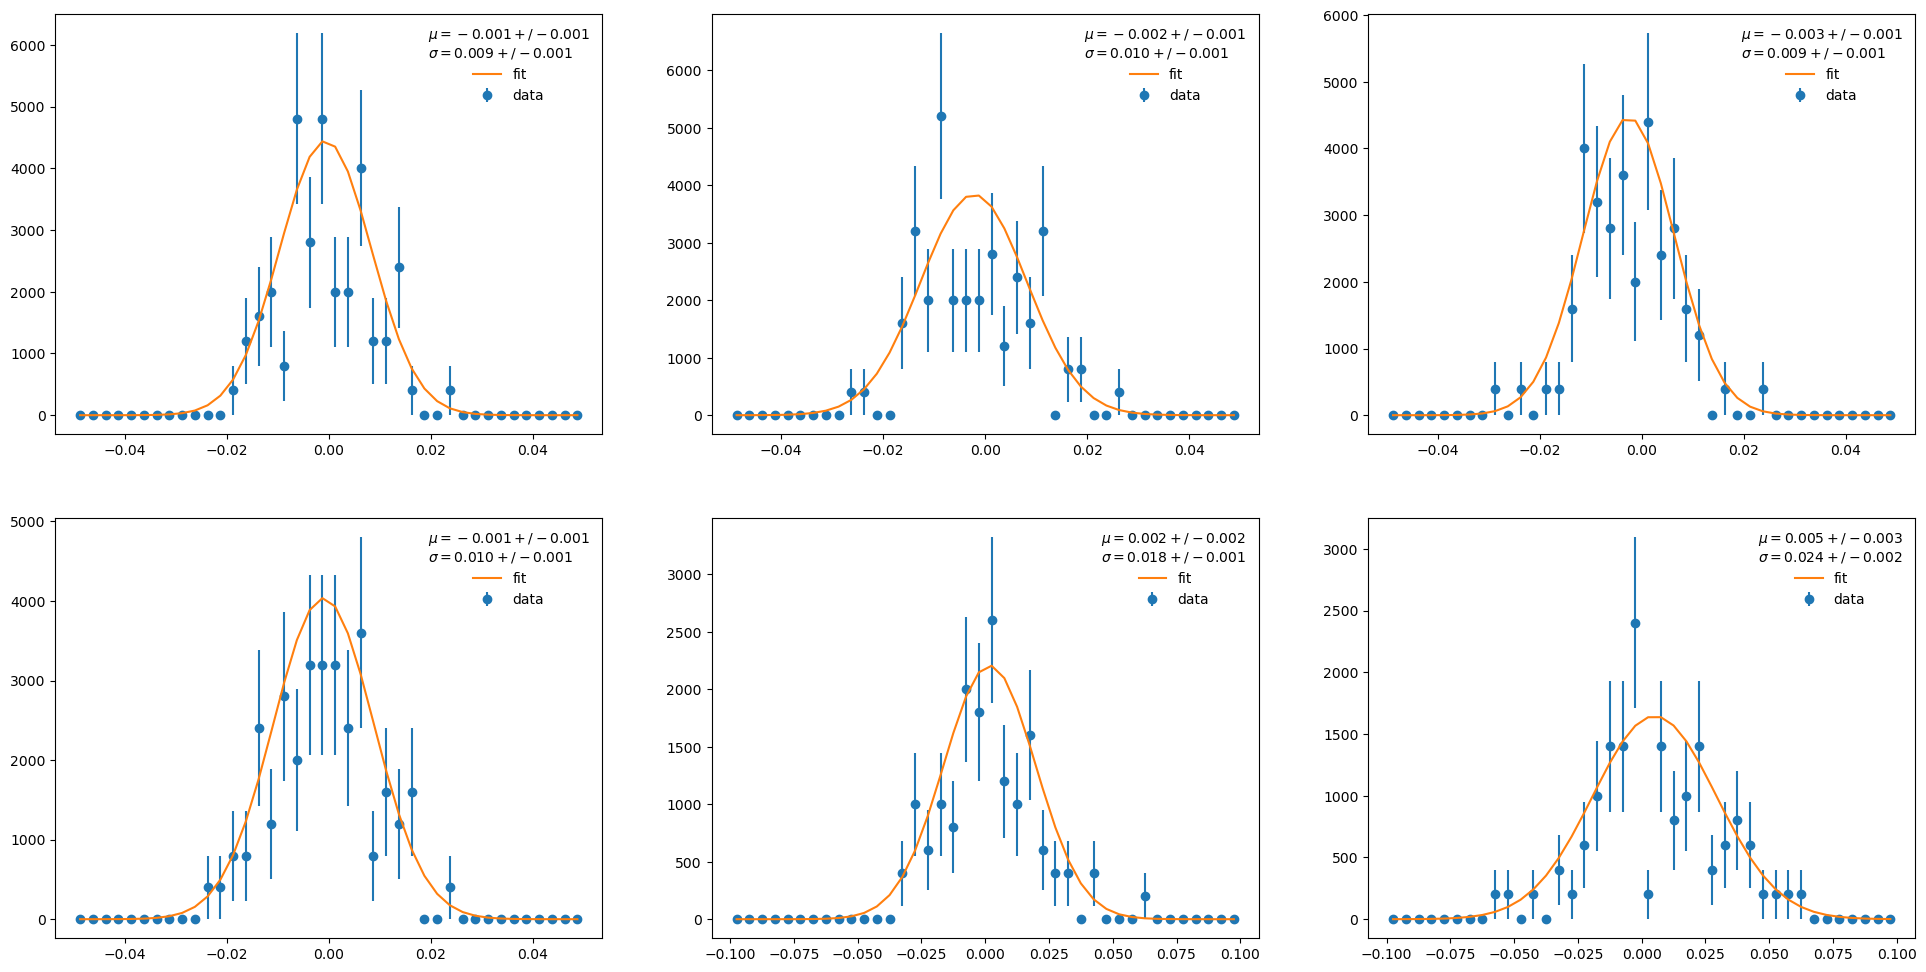

In [11]:
#Fit with Gaussian with iminuit
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL

ax= [ax1, ax2, ax3, ax4, ax5, ax6]
bound = [0.05, 0.05, 0.05, 0.05, 0.1, 0.1]

fig, ((ax[0], ax[1], ax[2]), (ax[3], ax[4], ax[5])) = plt.subplots(2, 3, figsize=(8*3, 6*2))
i=0
for data in [xp_res, yp_res, xm_res, ym_res, xxi_res, yxi_res]:
    def pdf(x, mu, sigma):
        return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))
    
    c = UnbinnedNLL(data, pdf)
    
    m = Minuit(c, mu=0, sigma=0.01)
    m.migrad()
    m.hesse()
    print(m)
    
    w, xe = np.histogram(data, bins=40, range=(-bound[i], bound[i]))
    
    # compute bin-wise density estimates
    werr = w ** 0.5
    cx = 0.5 * (xe[1:] + xe[:-1])
    dx = np.diff(xe)
    d = w / dx
    derr = werr / dx
    #m.visualize()
# plot everything


    ax[i].errorbar(cx, d, derr, fmt="o", label="data", zorder=0)
    ax[i].plot(cx, 100*pdf(cx, m.values[0], m.values[1]),
         label="fit")
    ax[i].legend(frameon=False,
           title=f"$\mu = {m.values[0]:.3f} +/- {m.errors[0]:.3f}$\n"
                 f"$\sigma = {m.values[1]:.3f} +/- {m.errors[1]:.3f}$");
    i+=1

In [12]:

foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
cov = []


for result_file in result_files:
    idx = 0
    cov_temp = []
    with open(result_file) as f:
        for l in f:
            for i_dex in range(0,6):
                if f"│  x{i_dex} │" in l:
                    a = l.split()
                    cov_CKM_row = []
                    for j_dex in range(0,6):
                        cov_CKM_row += [float(a[3+j_dex])]
                    cov_temp += [cov_CKM_row]

            log_strings += [l.replace("\n", "")]
        cov += cov_temp[0:6]



X = []
for i in range(len(xp)):
    X += [[xp[i].n, yp[i].n, xm[i].n, ym[i].n, xxi[i].n, yxi[i].n]]


In [13]:
print(cov[6:12])

[[8.17e-05, 1.42e-05, -7.59e-07, -1.48e-07, -1.72e-05, 1.31e-05], [1.42e-05, 0.000109, 6.48e-07, -4.35e-07, -1.04e-05, -4.85e-06], [-7.59e-07, 6.48e-07, 7.86e-05, -1.11e-05, -7.03e-06, -2.64e-05], [-1.48e-07, -4.35e-07, -1.11e-05, 0.0001, 9.68e-06, 9.44e-06], [-1.72e-05, -1.04e-05, -7.03e-06, 9.68e-06, 0.000273, 2.78e-05], [1.31e-05, -4.85e-06, -2.64e-05, 9.44e-06, 2.78e-05, 0.000304]]


In [14]:

def deg_to_rad(deg):
    return deg*np.pi/180

def rad_to_deg(rad):
    return rad*180/np.pi

def get_correlation_matrix(cov_matrix):
    corr_matrix = cov_matrix*0
    n = np.shape(cov_matrix)[0]
    for i in range(0, n):
        for j in range(0, n):
            corr_matrix[i, j] = cov_matrix[i, j]/math.sqrt(cov_matrix[i, i]*cov_matrix[j, j])
    return corr_matrix

def add_fit_result_details(res, data, H):
    
    # add the same results as in the yield fits
    ndf = len(data)-6
    res.p_value = 1 - stats.chi2.cdf(2*res.fun, ndf)

    res.H = H

    res.cov_mat = np.linalg.inv(res.H)
    try:
        res.cor_mat = get_correlation_matrix(res.cov_mat)
    except ValueError:
        # something went wrong when inverting
        # negative elements in covariance matrix diag
        # don't trust results
        res.success = False
        res.cor_mat = 0 * H
    res.x_unc = np.sqrt(np.diag(res.cov_mat))

    # translate to degrees; 1st save raw results
    res.raw_x = np.copy(res.x)
    res.raw_x_unc = np.copy(res.x_unc)

    # ensure angles are positive
    while res.x[0] < 0: res.x[0] += 2*math.pi
    while res.x[2] < 0: res.x[2] += 2*math.pi

    for i in range(len(res.x)):
        if (i % 2) == 0:
            # every other result is an angle, so apply rad_to_deg
            res.x[i] = rad_to_deg(res.x[i])
            res.x_unc[i] = rad_to_deg(res.x_unc[i])

    return res

In [15]:
# Chi2 residual for Parameters to fit: r, delta, gamma

def xm(rB, deltaB, gamma):
    xm = rB*np.cos(deltaB - gamma)
    return xm

def xp(rB, deltaB, gamma):
    xp = rB*np.cos(deltaB + gamma)
    return xp

def ym(rB, deltaB, gamma):
    ym = rB*np.sin(deltaB - gamma)
    return ym

def yp(rB, deltaB, gamma):
    yp = rB*np.sin(deltaB + gamma)
    return yp

def x_xi(rB, deltaB, rB_DPi, deltaB_DPi):
    x_xi = rB_DPi/rB*np.cos(deltaB_DPi - deltaB)
    return x_xi

def y_xi(rB, deltaB, rB_DPi, deltaB_DPi):
    y_xi = rB_DPi/rB*np.sin(deltaB_DPi - deltaB)
    return y_xi

def get_xy_xi(physics_param):
    ''' takes an input vector with [gamma, rB, deltaB] and returns x, y
    angles in RADIANS
    '''
    gamma  = physics_param[0]
    r_dk   = physics_param[1]
    d_dk   = physics_param[2]
    r_dpi  = physics_param[3]
    d_dpi  = physics_param[4]

    xm = r_dk * np.cos(d_dk - gamma)
    xp = r_dk * np.cos(d_dk + gamma)
    ym = r_dk * np.sin(d_dk - gamma)
    yp = r_dk * np.sin(d_dk + gamma)

    x_xi = (r_dpi/r_dk)*np.cos(d_dpi-d_dk)
    y_xi = (r_dpi/r_dk)*np.sin(d_dpi-d_dk)

    return [xp, yp, xm, ym,  x_xi, y_xi]

In [16]:

def fit(xy_xi_vector, xy_xi_cov_mat, start_guess =  [deg_to_rad(75.), 0.1, deg_to_rad(130.), 0.005, deg_to_rad(230.)]):

    xy_xi_cov_mat_inv = np.linalg.inv(xy_xi_cov_mat) # covariance matrix

    # bound r's to be positive
    bounds = [(0, math.pi), 
        (1e-5, None), (None, None),
        (1e-5, None), (None, None)]

    res = minimize(chi_square_func_for_xy_xi, 
        start_guess, 
        (xy_xi_vector, xy_xi_cov_mat_inv),
        method = 'L-BFGS-B',
        bounds=bounds)

    H_func = hessian(chi_square_func_for_xy_xi)
    H = H_func(np.array(res.x), xy_xi_vector, xy_xi_cov_mat_inv)

    res = add_fit_result_details(res, xy_xi_vector,  H)

    return res.x, res.x_unc, res

def chi_square_func_for_xy_xi(physics_param, *args):
    ''' chi square for physics param = [xm, ym, xp, yp, x_xi, y_xi]'''
    xy_xi_vector = args[0]
    xy_xi_cov_mat_inv = args[1]
    fit_xy_xi_vector = np.array(get_xy_xi(physics_param))
    dx = xy_xi_vector - fit_xy_xi_vector
    chi_square = 0.5*np.dot(
        np.dot(dx.transpose(),xy_xi_cov_mat_inv),
        dx)
    return chi_square 

def add_fit_result_details(res, data, H):
    
    # add the same results as in the yield fits
    ndf = len(data)-6
    res.p_value = 1 - stats.chi2.cdf(2*res.fun, ndf)

    res.H = H

    res.cov_mat = np.linalg.inv(res.H)
    try:
        res.cor_mat = get_correlation_matrix(res.cov_mat)
    except ValueError:
        # something went wrong when inverting
        # negative elements in covariance matrix diag
        # don't trust results
        res.success = False
        res.cor_mat = 0 * H
    res.x_unc = np.sqrt(np.diag(res.cov_mat))

    # translate to degrees; 1st save raw results
    res.raw_x = np.copy(res.x)
    res.raw_x_unc = np.copy(res.x_unc)

    # ensure angles are positive
    while res.x[0] < 0: res.x[0] += 2*math.pi
    while res.x[2] < 0: res.x[2] += 2*math.pi

    for i in range(len(res.x)):
        if (i % 2) == 0:
            # every other result is an angle, so apply rad_to_deg
            res.x[i] = rad_to_deg(res.x[i])
            res.x_unc[i] = rad_to_deg(res.x_unc[i])

    return res

In [17]:
print(len(xp_pull))

80


In [18]:
result = []
for i in range(len(xp_pull)):
    result.append(fit(X[i], cov[i*6:6*(i+1)]))

/software/pc24403/miniconda3/envs/pcbpggsz/lib/python3.8/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in sqrt
  return f_raw(*args, **kwargs)


In [19]:
gamma = []
dB_dk = []
rB_dk = []
rB_dpi = []
dB_dpi = []
for i in range(len(xp_pull)):
    gamma.append(result[i][0][0])
    rB_dk.append(result[i][0][1])
    dB_dk.append(result[i][0][2])
    rB_dpi.append(result[i][0][3])
    dB_dpi.append(result[i][0][4])

Text(0.5, 0.4, 'Input: 291')

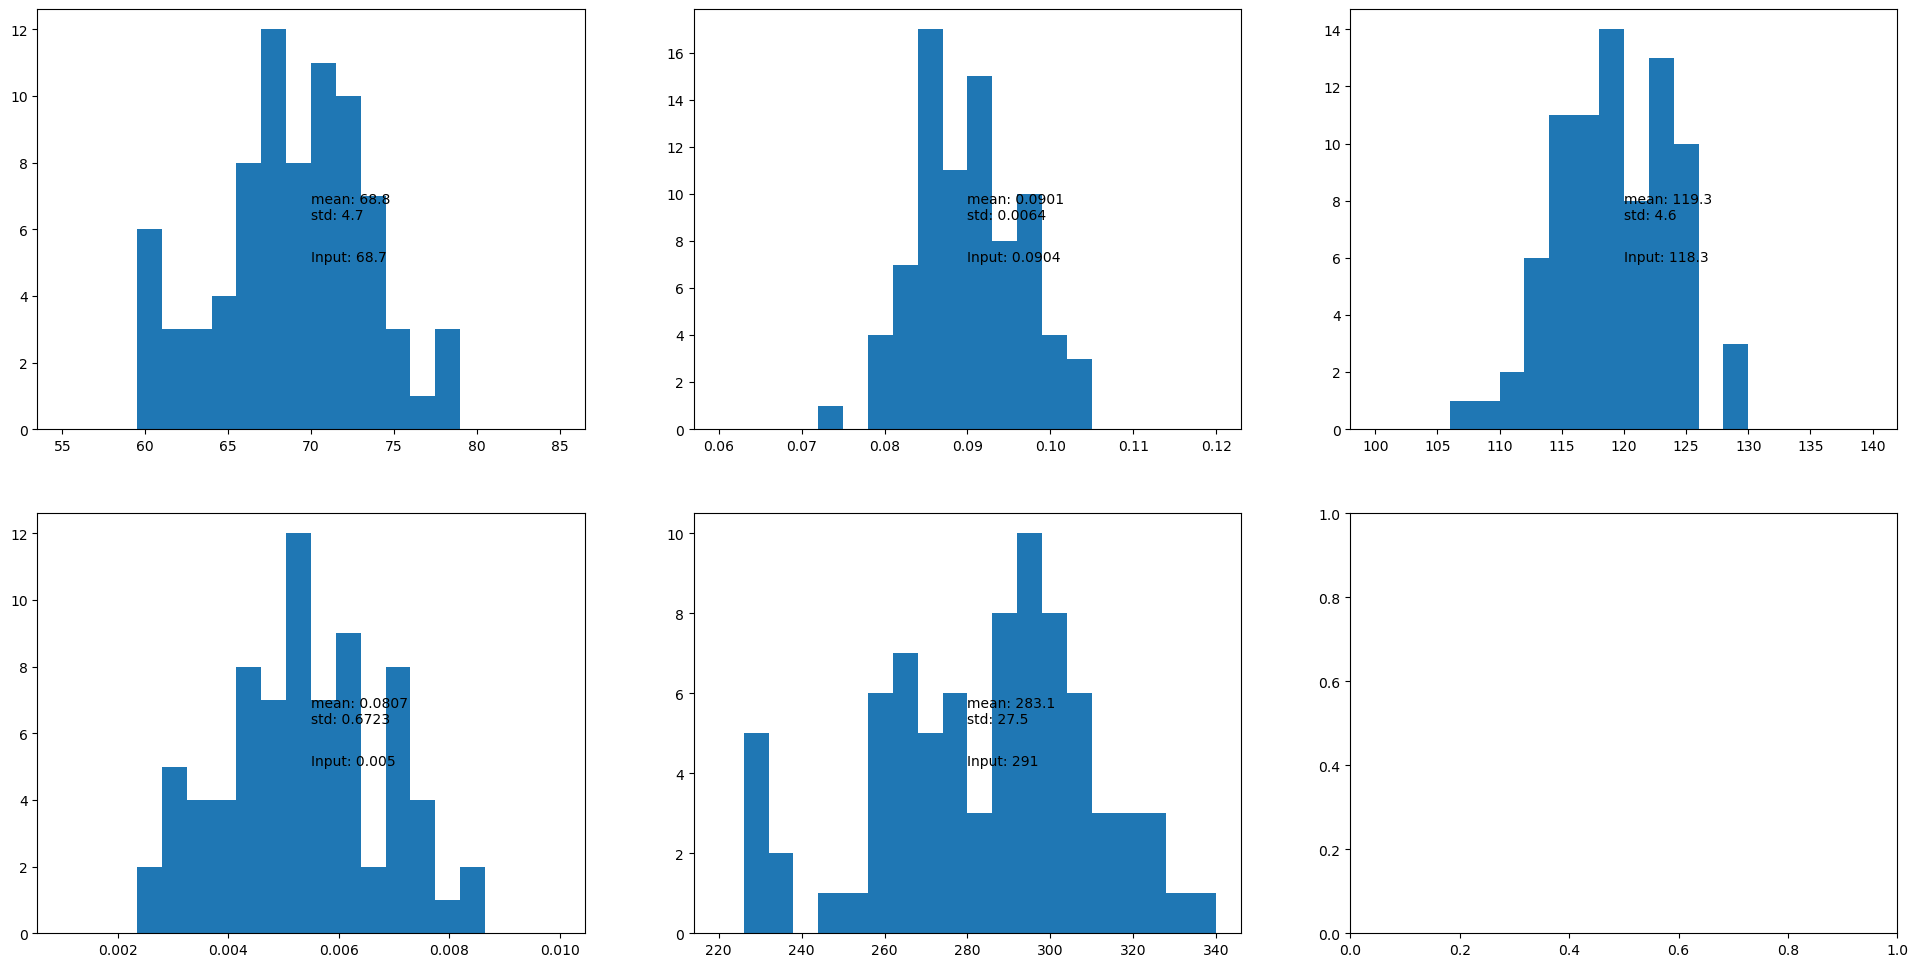

In [20]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8*3, 6*2))

ax1.hist(gamma, bins=20, range=(55, 85), label="gamma")
ax1.text(0.5, 0.5, f"mean: {np.mean(gamma):.1f}\nstd: {np.std(gamma):.1f}",
            transform=ax1.transAxes)
ax1.text(0.5, 0.4, "Input: 68.7", transform=ax1.transAxes)

ax2.hist(rB_dk, bins=20, range=(0.06, 0.12), label="rB_dk")
ax2.text(0.5, 0.5, f"mean: {np.mean(rB_dk):.4f}\nstd: {np.std(rB_dk):.4f}",
            transform=ax2.transAxes)
ax2.text(0.5, 0.4, "Input: 0.0904", transform=ax2.transAxes)

ax3.hist(dB_dk, bins=20, range=(100, 140), label="dB_dk")
ax3.text(0.5, 0.5, f"mean: {np.mean(dB_dk):.1f}\nstd: {np.std(dB_dk):.1f}",
            transform=ax3.transAxes)
ax3.text(0.5, 0.4, "Input: 118.3", transform=ax3.transAxes)


ax4.hist(rB_dpi, bins=20, range=(0.001, 0.01), label="rB_dpi")
ax4.text(0.5, 0.5, f"mean: {np.mean(rB_dpi):.4f}\nstd: {np.std(rB_dpi):.4f}",
            transform=ax4.transAxes)
ax4.text(0.5, 0.4, "Input: 0.005", transform=ax4.transAxes)

ax5.hist(dB_dpi, bins=20, range=(220, 340), label="dB_dpi")
ax5.text(0.5, 0.5, f"mean: {np.mean(dB_dpi):.1f}\nstd: {np.std(dB_dpi):.1f}",
            transform=ax5.transAxes)
ax5.text(0.5, 0.4, "Input: 291", transform=ax5.transAxes)




In [21]:
logfile = "/dice/users/pc24403/BPGGSZ/sim_fit_new/nohup.out"
time_arr=[]
with open(logfile) as f:
    for l in f:
        if "Total time" in l:
            a=l.split()
            time_arr.append(float(a[2]))


In [22]:
time_arr_gpu = [arr for arr in time_arr if arr < 300]
time_arr_cpu = [arr for arr in time_arr if arr > 300]

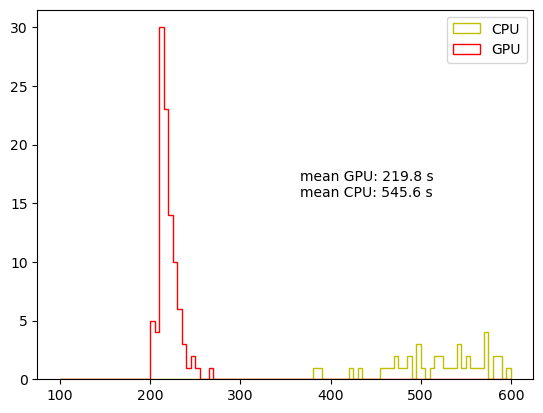

In [23]:
plt.hist([time_arr_gpu, time_arr_cpu] ,range=[100, 600],bins=100, color=["r", 'y'], histtype='step', label=['GPU', 'CPU'])
plt.text(-1.2, 0.2, f"mean GPU: {np.mean(time_arr_gpu):.1f} s\nmean CPU: {np.mean(time_arr_cpu):.1f} s",
            transform=ax5.transAxes)
plt.legend()